In [150]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import itertools
import seaborn as sns

In [20]:
num_heads = 16
num_flips = 20
prob_head = 0.5
prob = stats.binom_test(num_heads, num_flips, prob_head)
print(f"Probability of observing more than 15 heads or 15 tails is {prob:.17f}")

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


In [21]:
# using probability mass function
prob_16_heads = stats.binom.pmf(num_heads, num_flips, prob_head) 
print(f"The probability of seeing {num_heads} of {num_flips} heads is {prob_16_heads}")

The probability of seeing 16 of 20 heads is 0.004620552062988286


In [4]:
probabilities = stats.binom.pmf([4, 16], num_flips, prob_head) 
assert probabilities.tolist() == [prob_16_heads] * 2

In [5]:
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, prob_head) 
total_prob = probabilities.sum()
print(f"Total sum of probabilities equals {total_prob:.14f}")

Total sum of probabilities equals 1.00000000000000


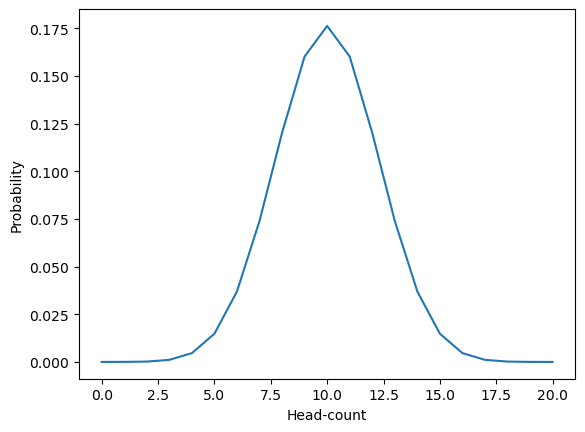

In [6]:
import matplotlib.pyplot as plt
plt.plot(interval_all_counts, probabilities)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

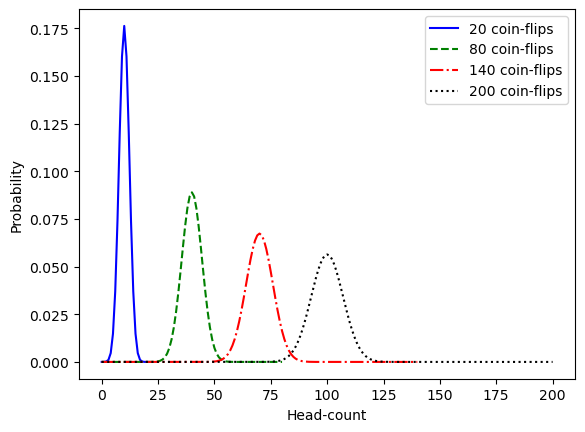

In [8]:
flip_counts = [20, 80, 140, 200]
linestyles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'k']
for num_flips, linestyle, color in zip(flip_counts, linestyles, colors): 
    x_values = range(num_flips + 1)
    y_values = stats.binom.pmf(x_values, num_flips, 0.5) 
    plt.plot(x_values, y_values, linestyle=linestyle, color=color, label=f'{num_flips} coin-flips')
plt.legend()
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

In [1]:
#  mean as a measure of centrality 

import numpy as np
measurements = np.array([80, 77, 73, 61, 74, 79, 81])

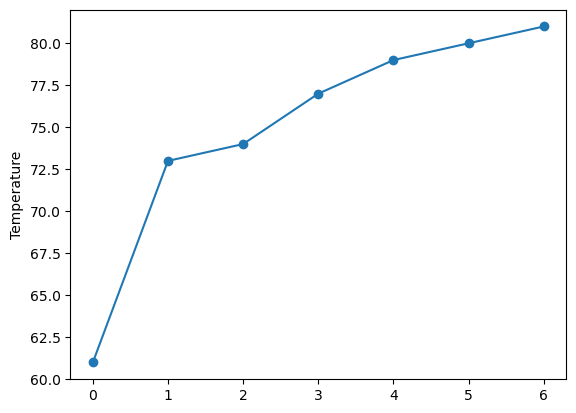

In [4]:
measurements.sort()
number_of_days = measurements.size
plt.plot(range(number_of_days), measurements)
plt.scatter(range(number_of_days), measurements)
plt.ylabel('Temperature')
plt.show()

In [5]:
difference = measurements.max() - measurements.min()
midpoint = measurements.min() + difference / 2
assert midpoint == (measurements.max() + measurements.min()) / 2 
print(f"The midpoint temperature is {midpoint} degrees")


The midpoint temperature is 71.0 degrees


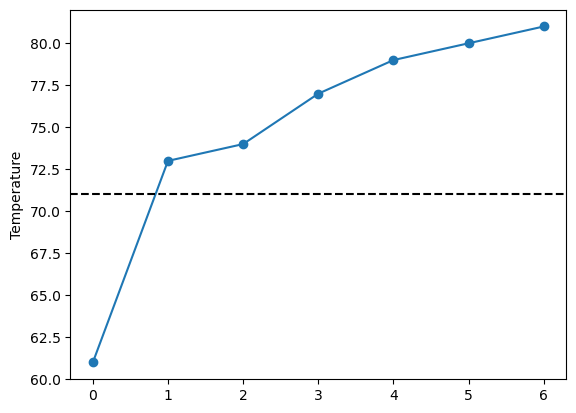

In [6]:
plt.plot(range(number_of_days), measurements) 
plt.scatter(range(number_of_days), measurements) 
plt.axhline(midpoint, color='k', linestyle='--') 
plt.ylabel('Temperature')
plt.show()

The median temperature is 77 degrees


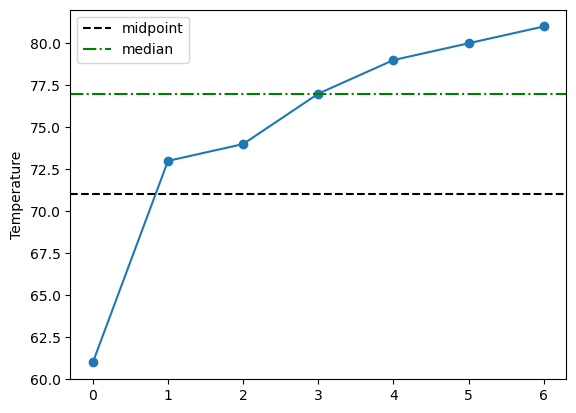

In [7]:
median = measurements[3]
print(f"The median temperature is {median} degrees") 
plt.plot(range(number_of_days), measurements) 
plt.scatter(range(number_of_days), measurements) 
plt.axhline(midpoint, color='k', linestyle='--', label='midpoint') 
plt.axhline(median, color='g', linestyle='-.', label='median') 
plt.legend()
plt.ylabel('Temperature')
plt.show()

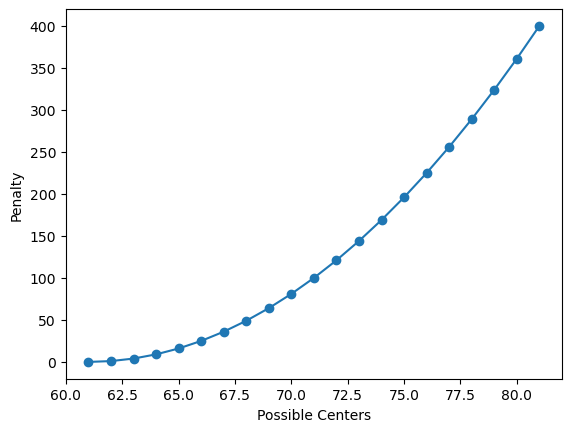

In [8]:
def squared_distance(value1, value2):
    return (value1 - value2) ** 2
possible_centers = range(measurements.min(), measurements.max() + 1) 
penalties = [squared_distance(center, 61) for center in possible_centers] 
plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel('Possible Centers')
plt.ylabel('Penalty')
plt.show()

In [9]:
def sum_of_squared_distances(value, measurements):
    return sum(squared_distance(value, m) for m in measurements)

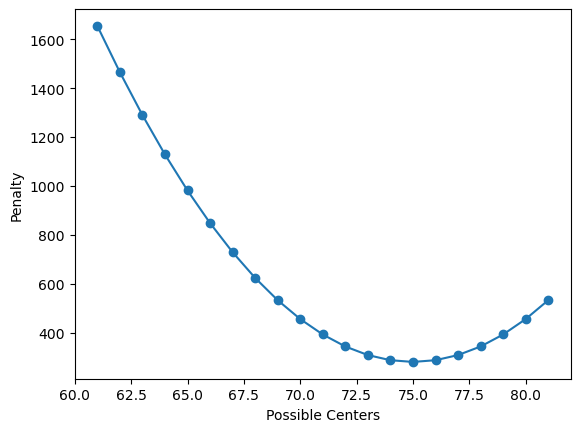

In [10]:
penalties = [sum_of_squared_distances(center, measurements) for center in possible_centers]
plt.plot(possible_centers, penalties)
plt.scatter(possible_centers, penalties)
plt.xlabel('Possible Centers')
plt.ylabel('Penalty')
plt.show()

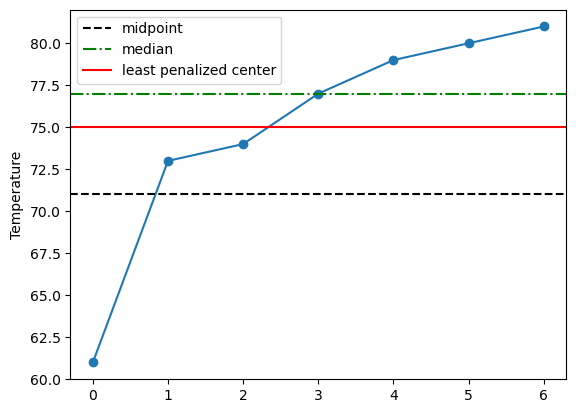

In [12]:
least_penalized = 75
assert least_penalized == possible_centers[np.argmin(penalties)]
plt.plot(range(number_of_days), measurements) 
plt.scatter(range(number_of_days), measurements) 
plt.axhline(midpoint, color='k', linestyle='--', label='midpoint') 
plt.axhline(median, color='g', linestyle='-.', label='median') 
plt.axhline(least_penalized, color='r', linestyle='-',
            label='least penalized center')
plt.legend()
plt.ylabel('Temperature')
plt.show()

In [13]:
assert measurements.sum() / measurements.size == least_penalized

In [14]:
mean = measurements.mean()
assert mean == least_penalized
assert mean == np.mean(measurements)
assert mean == np.average(measurements)

In [15]:
equal_weights = [1] * 7
assert mean == np.average(measurements, weights=equal_weights)
unequal_weights = [100] + [1] * 6
assert mean != np.average(measurements, weights=unequal_weights)

In [16]:
weighted_mean = np.average([75, 77], weights=[9, 1])
print(f"The mean is {weighted_mean}")
assert weighted_mean == np.mean(9 * [75] + [77]) == weighted_mean

The mean is 75.2


In [17]:
assert weighted_mean == np.average([75, 77], weights=[900, 100]) 
assert weighted_mean == np.average([75, 77], weights=[0.9, 0.1])

The mean of the binomial is 10.00 heads


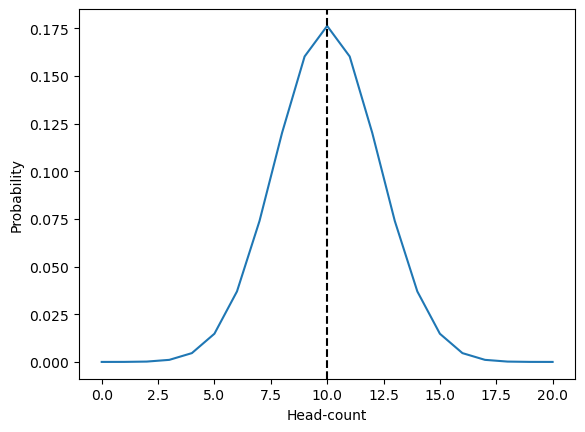

In [22]:
num_flips = 20
interval_all_counts = range(num_flips + 1)
probabilities = stats.binom.pmf(interval_all_counts, 20, prob_head) 
mean_binomial = np.average(interval_all_counts, weights=probabilities) 
print(f"The mean of the binomial is {mean_binomial:.2f} heads") 
plt.plot(interval_all_counts, probabilities) 
plt.axvline(mean_binomial, color='k', linestyle='--') 
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

In [23]:
assert stats.binom.mean(num_flips, 0.5) == 10

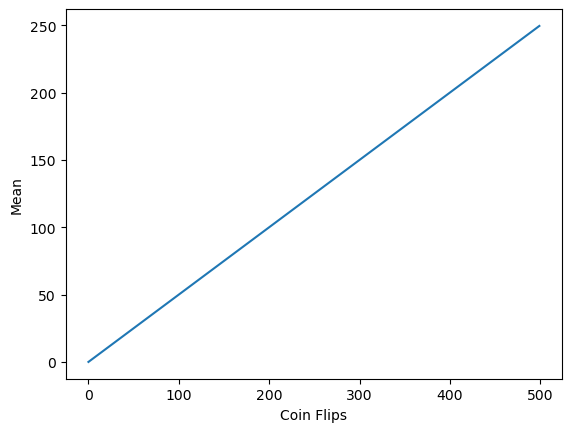

In [25]:
means = [stats.binom.mean(num_flips, 0.5) for num_flips in range(500)] 
plt.plot(range(500), means)
plt.xlabel('Coin Flips')
plt.ylabel('Mean')
plt.show()

In [26]:
num_flips = 1
assert stats.binom.mean(num_flips, 0.5) == 0.5

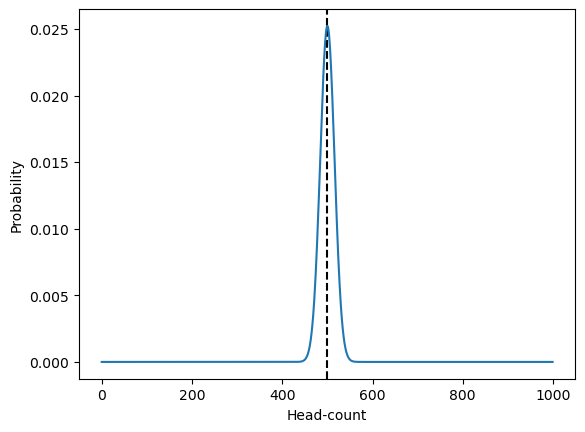

In [28]:
num_flips = 1000
assert stats.binom.mean(num_flips, 0.5) == 500
interval_all_counts = range(num_flips)
probabilities = stats.binom.pmf(interval_all_counts, num_flips, 0.5) 
plt.axvline(500, color='k', linestyle='--') 
plt.plot(interval_all_counts, probabilities) 
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

In [29]:
california = np.array([52, 77, 96])
kentucky = np.array([71, 75, 79])
print(f"Mean California temperature is {california.mean()}") 
print(f"Mean Kentucky temperature is {california.mean()}")

Mean California temperature is 75.0
Mean Kentucky temperature is 75.0


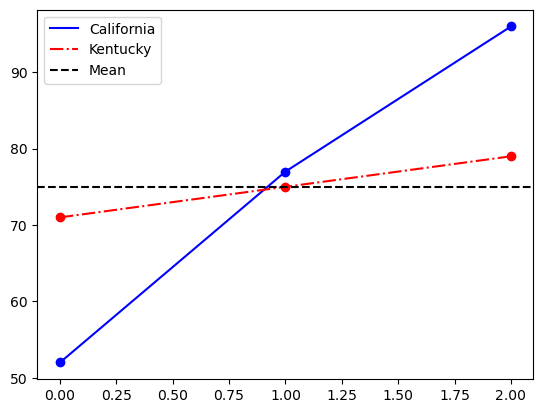

In [32]:
plt.plot(range(3), california, color='b', label='California') 
plt.scatter(range(3), california, color='b')
plt.plot(range(3), kentucky, color='r', linestyle='-.', label='Kentucky') 
plt.scatter(range(3), kentucky, color='r')
plt.axhline(75, color='k', linestyle='--', label='Mean') 
plt.legend()
plt.show()

In [34]:
def sum_of_squares(data):
    mean = np.mean(data)
    return sum(squared_distance(value, mean) for value in data)
california_sum_squares = sum_of_squares(california) 
print(f"California's sum of squares is {california_sum_squares}")


California's sum of squares is 974.0


In [35]:
kentucky_sum_squares = sum_of_squares(kentucky) 
print(f"Kentucky's sum of squares is {kentucky_sum_squares}")


Kentucky's sum of squares is 32.0


In [36]:
california_duplicated = np.array(california.tolist() * 2) 
duplicated_sum_squares = sum_of_squares(california_duplicated) 
print(f"Duplicated California sum of squares is {duplicated_sum_squares}") 
assert duplicated_sum_squares == 2 * california_sum_squares

Duplicated California sum of squares is 1948.0


In [38]:
value1 = california_sum_squares / california.size
value2 = duplicated_sum_squares / california_duplicated.size 
assert value1 == value2

In [39]:
def variance(data):
    mean = np.mean(data)
    return np.mean([squared_distance(value, mean) for value in data])
assert variance(california) == california_sum_squares / california.size

In [40]:
assert variance(california) == variance(california_duplicated)

In [42]:
california_variance = variance(california) 
kentucky_variance = variance(kentucky) 
print(f"California Variance is {california_variance}") 
print(f"Kentucky Variance is {kentucky_variance}")

California Variance is 324.6666666666667
Kentucky Variance is 10.666666666666666


In [43]:
assert california_variance == california.var()
assert california_variance == np.var(california)

In [44]:
def weighted_variance(data, weights):
    mean = np.average(data, weights=weights)
    squared_distances = [squared_distance(value, mean) for value in data] 
    return np.average(squared_distances, weights=weights)
assert weighted_variance([75, 77], [9, 1]) == np.var(9 * [75] + [77])

In [45]:
interval_all_counts = range(21)
probabilities = stats.binom.pmf(interval_all_counts, 20, prob_head) 
variance_binomial = weighted_variance(interval_all_counts, probabilities) 
print(f"The variance of the binomial is {variance_binomial:.2f} heads")


The variance of the binomial is 5.00 heads


In [46]:
assert stats.binom.var(20, prob_head) == 5.0
assert stats.binom.var(20, prob_head) == stats.binom.mean(20, prob_head) / 2

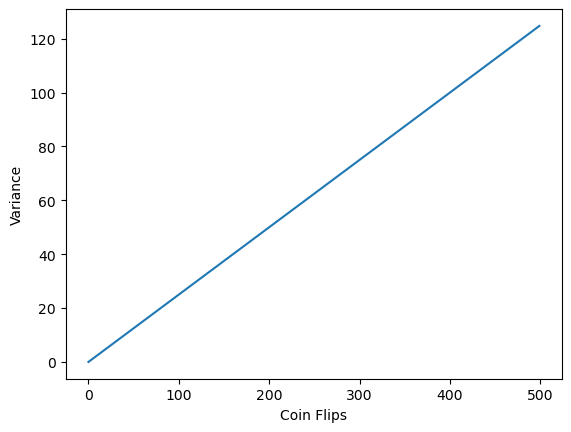

In [47]:
variances = [stats.binom.var(num_flips, prob_head) for num_flips in range(500)]
plt.plot(range(500), variances)
plt.xlabel('Coin Flips')
plt.ylabel('Variance')
plt.show()

In [48]:
assert stats.binom.var(1, 0.5) == 0.25
assert stats.binom.var(1000, 0.5) == 250

In [49]:
data = [1, 2, 3]
standard_deviation = np.std(data)
assert standard_deviation ** 2 == np.var(data)

In [50]:
np.random.seed(0)
sample_size = 10000
sample = np.array([np.random.binomial(1, 0.5) for _ in range(sample_size)]) 
head_count = sample.sum()
head_count_frequency = head_count / sample_size
assert head_count_frequency == sample.mean()

In [51]:
np.random.seed(0)
frequencies = np.random.binomial(sample_size, 0.5, 100000) / sample_size

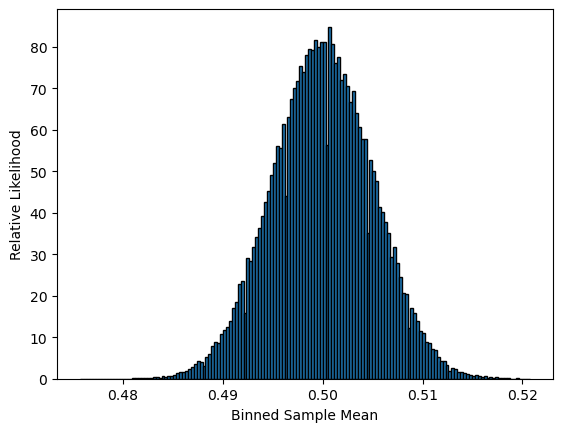

In [52]:
sample_means = frequencies
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto', edgecolor='black', density=True)
plt.xlabel('Binned Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

In [53]:
mean_normal = np.average(bin_edges[:-1], weights=likelihoods) 
var_normal = weighted_variance(bin_edges[:-1], likelihoods) 
std_normal = var_normal ** 0.5
print(f"Mean is approximately {mean_normal:.2f}") 
print(f"Standard deviation is approximately {std_normal:.3f}")


Mean is approximately 0.50
Standard deviation is approximately 0.005


In [54]:
import math
peak_x_value = bin_edges[likelihoods.argmax()]
print(f"Mean is approximately {peak_x_value:.2f}")
peak_y_value = likelihoods.max()
std_from_peak = (peak_y_value * (2* math.pi) ** 0.5) ** -1 
print(f"Standard deviation is approximately {std_from_peak:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


In [55]:
fitted_mean, fitted_std = stats.norm.fit(sample_means) 
print(f"Mean is approximately {fitted_mean:.2f}") 
print(f"Standard deviation is approximately {fitted_std:.3f}")

Mean is approximately 0.50
Standard deviation is approximately 0.005


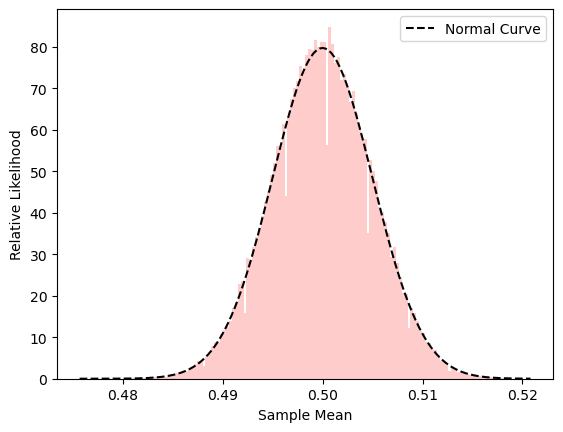

In [56]:
normal_likelihoods = stats.norm.pdf(bin_edges, fitted_mean, fitted_std) 
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--', label='Normal Curve')
plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True) 
plt.legend()
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

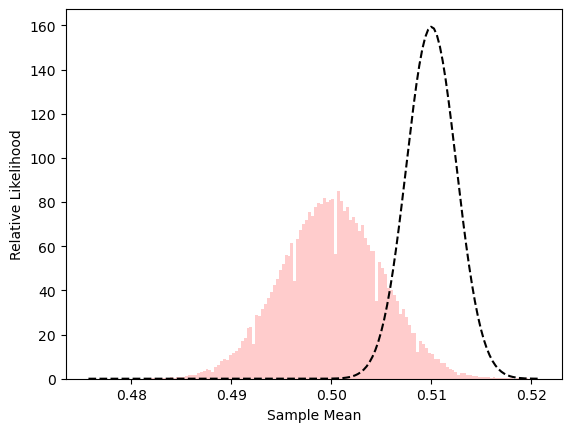

In [57]:
adjusted_likelihoods = stats.norm.pdf(bin_edges, fitted_mean + 0.01, fitted_std / 2)
plt.plot(bin_edges, adjusted_likelihoods, color='k', linestyle='--') 
plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True) 
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

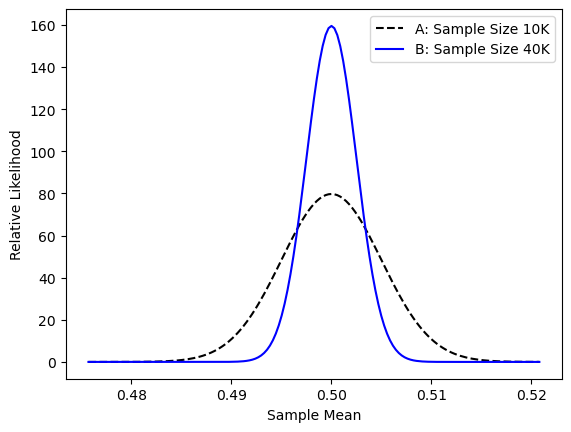

In [59]:
np.random.seed(0)
new_sample_size = 40000
new_head_counts = np.random.binomial(new_sample_size, 0.5, 100000)
new_mean, new_std = stats.norm.fit(new_head_counts / new_sample_size)
new_likelihoods = stats.norm.pdf(bin_edges, new_mean, new_std)
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--',label='A: Sample Size 10K')




plt.plot(bin_edges, new_likelihoods, color='b', label='B: Sample Size 40K') 
plt.legend()
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()


In [61]:
mean, std = new_mean, new_std
start, end = stats.norm.interval(0.95, mean, std)
print(f"The true mean of the sampled binomial distribution is between {start:.3f} and {end:.3f}")
assert stats.binom.mean(1, 0.5) == 0.5

The true mean of the sampled binomial distribution is between 0.495 and 0.505


In [62]:
variance_ratio = (new_std ** 2) / (fitted_std ** 2)
print(f"The ratio of variances is approximately {variance_ratio:.2f}")

The ratio of variances is approximately 0.25


In [64]:
np.random.seed(0)
reduced_sample_size = 2500
head_counts = np.random.binomial(reduced_sample_size, 0.5, 100000)
_, std = stats.norm.fit(head_counts / reduced_sample_size) 
variance_ratio = (std ** 2) / (fitted_std ** 2)
print(f"The ratio of variances is approximately {variance_ratio:.1f}")

The ratio of variances is approximately 4.0


In [66]:
estimated_variance = (fitted_std ** 2) * 10000
print(f"Estimated variance for a sample size of 1 is {estimated_variance:.2f}")
assert stats.binom.var(1, 0.5) == 0.25

Estimated variance for a sample size of 1 is 0.25


In [67]:
np.random.seed(0)
population_ages = np.random.randint(1, 85, size=50000)

In [68]:
population_mean = population_ages.mean()
population_variance = population_ages.var()


In [69]:
np.random.seed(0)
sample_size = 10
sample = np.random.choice(population_ages, size=sample_size) 
sample_mean = sample.mean()


In [70]:
percent_diff = lambda v1, v2: 100 * abs(v1 - v2) / v2
percent_diff_means = percent_diff(sample_mean, population_mean) 
print(f"There is a {percent_diff_means:.2f} percent difference between means.")

There is a 27.59 percent difference between means.


In [71]:
np.random.seed(0)
sample_means = [np.random.choice(population_ages, size=sample_size).mean() for _ in range(100)]

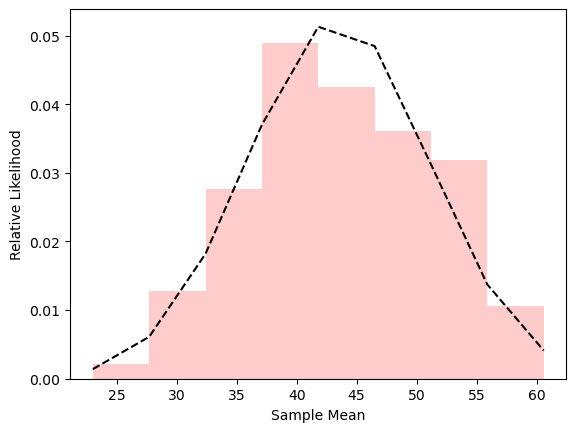

In [72]:
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto', alpha=0.2, color='r', density=True)
mean, std = stats.norm.fit(sample_means)
normal_likelihoods = stats.norm.pdf(bin_edges, mean, std) 
plt.plot(bin_edges, normal_likelihoods, color='k', linestyle='--') 
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

In [73]:
print(f"Actual population mean is approximately {population_mean:.2f}") 
percent_diff_means = percent_diff(mean, population_mean)
print(f"There is a {percent_diff_means:.2f}% difference between means.")


Actual population mean is approximately 42.53
There is a 2.17% difference between means.


In [74]:
normal_variance = std ** 2
estimated_variance = normal_variance * sample_size


In [75]:
print(f"Estimated variance is approximately {estimated_variance:.2f}") 
print(f"Actual population variance is approximately {population_variance:.2f}")
percent_diff_var = percent_diff(estimated_variance, population_variance) 
print(f"There is a {percent_diff_var:.2f} percent difference between variances.")

Estimated variance is approximately 576.73
Actual population variance is approximately 584.33
There is a 1.30 percent difference between variances.


In [76]:
population_mean = 84
population_variance = 25

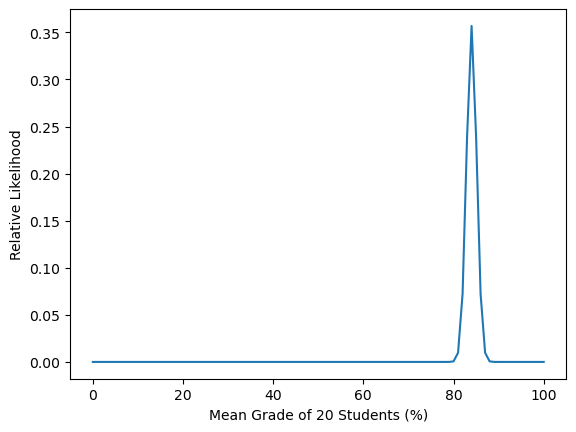

In [77]:
mean = population_mean
population_std = population_variance ** 0.5
sem = population_std / (20 ** 0.5)
grade_range = range(101)
normal_likelihoods = stats.norm.pdf(grade_range, mean, sem) 
plt.plot(grade_range, normal_likelihoods)
plt.xlabel('Mean Grade of 20 Students (%)') 
plt.ylabel('Relative Likelihood')
plt.show()

In [79]:
total_area = np.sum([normal_likelihoods[i: i + 2].sum() / 2 for i in range(normal_likelihoods.size - 1)])
assert total_area == np.trapz(normal_likelihoods) 
print(f"Estimated area under the curve is {total_area}")
assert stats.norm.sf(0, mean, sem) == 1.0

Estimated area under the curve is 1.0000000000384808


In [80]:
assert stats.norm.sf(mean, mean, sem) == 0.5
estimated_area = np.trapz(normal_likelihoods[mean:]) 
print(f"Estimated area beyond the mean is {estimated_area}")


Estimated area beyond the mean is 0.5000000000192404


In [81]:
area  = stats.norm.sf(90, mean, sem)
print(f"Probability of 20 students acing the exam is {area}")

Probability of 20 students acing the exam is 4.012555633463782e-08


### Hypothesis Testing

In [82]:
# divergence between sample mean and population mean

In [83]:
population_mean = 80
population_variance = 100

In [84]:
mean = population_mean
sem = (population_variance / 18) ** 0.5

In [85]:
prob_high_grade = stats.norm.sf(84, mean, sem)
print(f"Probability of an average grade >= 84 is {prob_high_grade}")

Probability of an average grade >= 84 is 0.044843010885182284


In [86]:
# pob of low grade
prob_low_grade = stats.norm.cdf(76, mean, sem)
print(f"Probability of an average grade <= 76 is {prob_low_grade}")

Probability of an average grade <= 76 is 0.044843010885182284


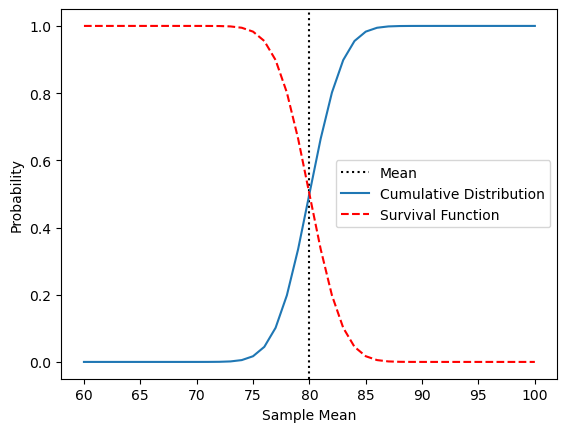

In [87]:
for x in range(-100, 100):
    sf_value = stats.norm.sf(mean + x, mean,  sem)
    assert sf_value == stats.norm.cdf(mean - x, mean, sem)
plt.axvline(mean, color='k', label='Mean', linestyle=':') 
x_values = range(60, 101)
plt.plot(x_values, stats.norm.cdf(x_values, mean, sem), label='Cumulative Distribution') 
plt.plot(x_values, stats.norm.sf(x_values, mean, sem), label='Survival Function', linestyle='--', color='r')
plt.xlabel('Sample Mean')
plt.ylabel('Probability')
plt.legend()
plt.show()


In [88]:
p_value = prob_low_grade + prob_high_grade
assert p_value == 2 * prob_high_grade
print(f"The p-value is {p_value}")


The p-value is 0.08968602177036457


In [89]:
def compute_p_value(observed_mean, population_mean, sem):
    mean_diff = abs(population_mean - observed_mean)
    prob_high = stats.norm.sf(population_mean + mean_diff, population_mean, sem) 
    return 2 * prob_high
new_p_value = compute_p_value(85, mean, sem) 
print(f"The updated p-value is {new_p_value}")


The updated p-value is 0.03389485352468927


In [91]:
for grade in range(80, 100):
    p_value = compute_p_value(grade, mean, sem)
    if p_value < 0.001:
        break
print(f"An average grade of {grade} leads to a p-value of {p_value}")


An average grade of 88 leads to a p-value of 0.0006885138966450773


In [92]:
np.random.seed(0)
random_average_grade = np.random.normal(mean, sem) 
print(f"Average grade equals {random_average_grade:.2f}")

Average grade equals 84.16


In [93]:
if compute_p_value(random_average_grade, mean, sem) <= 0.05: 
    print("The observed result is statistically significant")
else:
    print("The observed result is not statistically significant")


The observed result is not statistically significant


In [95]:
np.random.seed(0)
for i in range(1, 49):
    print(f"We visited state {i + 1}")
    random_average_grade = np.random.normal(mean, sem)
    p_value = compute_p_value(random_average_grade, mean, sem) 
    if p_value <= 0.05:
        print("We found a statistically significant result.") 
        print(f"The average grade was {random_average_grade:.2f}") 
        print(f"The p-value was {p_value}")
        break
if i == 48:
    print("We visited every state and found no significant results.")


We visited state 2
We visited state 3
We visited state 4
We visited state 5
We found a statistically significant result.
The average grade was 85.28
The p-value was 0.025032993883401307


In [96]:
num_planned_experiments = 49
significance_level = .05 / num_planned_experiments

In [97]:
np.random.seed(0)
for i in range(49):
    random_average_grade = np.random.normal(mean, sem)
    p_value = compute_p_value(random_average_grade, mean, sem)
    if p_value <= significance_level:
        print("We found a statistically significant result.") 
        print(f"The average grade was {random_average_grade:.2f}") 
        print(f"The p-value was {p_value}")
        break
if i == 48:
    print("We visited every state and found no significant results.")


We visited every state and found no significant results.


In [98]:
fish_lengths = np.array([46.7, 17.1, 2.0, 19.2, 7.9, 15.0, 43.4,
                         8.8, 47.8, 19.5, 2.9, 53.0, 23.5, 118.5,
                         3.8, 2.9, 53.9, 23.9, 2.0, 28.2])
assert fish_lengths.mean() == 27

In [99]:
np.random.seed(0)
random_fish_length = np.random.choice(fish_lengths, size=1)[0] 
sampled_fish_lengths = [random_fish_length]

In [100]:
np.random.seed(0)
for _ in range(20):
    random_fish_length = np.random.choice(fish_lengths, size=1)[0] 
    sampled_fish_lengths.append(random_fish_length)


In [101]:
sample_mean = np.mean(sampled_fish_lengths)
print(f"Mean of sampled fish lengths is {sample_mean:.2f} cm")


Mean of sampled fish lengths is 26.03 cm


In [102]:
np.random.seed(0)
new_sampled_fish_lengths = np.random.choice(fish_lengths, size=20, replace=True)
new_sample_mean = new_sampled_fish_lengths.mean()
print(f"Mean of the new sampled fish lengths is {new_sample_mean:.2f} cm")


Mean of the new sampled fish lengths is 26.16 cm


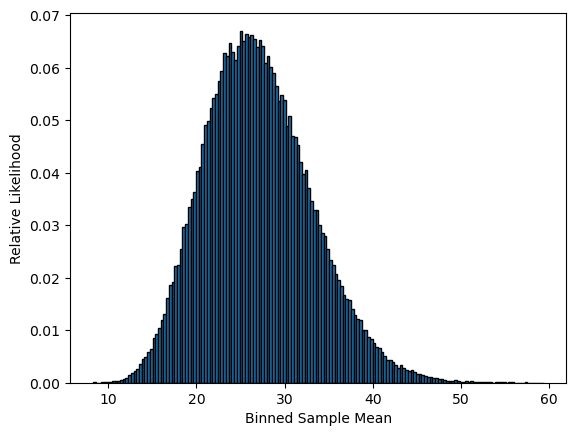

In [103]:
np.random.seed(0)
sample_means = [np.random.choice(fish_lengths, size=20, replace=True).mean() for _ in range(150000)]
likelihoods, bin_edges, _ = plt.hist(sample_means, bins='auto', edgecolor='black', density=True)
plt.xlabel('Binned Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

In [104]:
assert abs(stats.skew(sample_means)) > 0.4

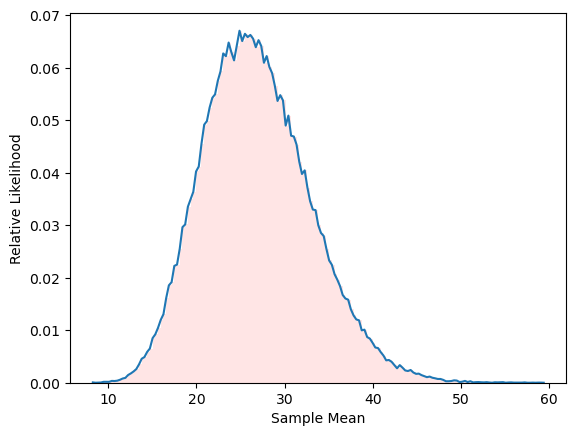

In [105]:
random_variable = stats.rv_histogram((likelihoods, bin_edges)) 
plt.plot(bin_edges, random_variable.pdf(bin_edges)) 
plt.hist(sample_means, bins='auto', alpha=0.1, color='r', density=True) 
plt.xlabel('Sample Mean')
plt.ylabel('Relative Likelihood')
plt.show()

Mean of the distribution is approximately 27.00 cm


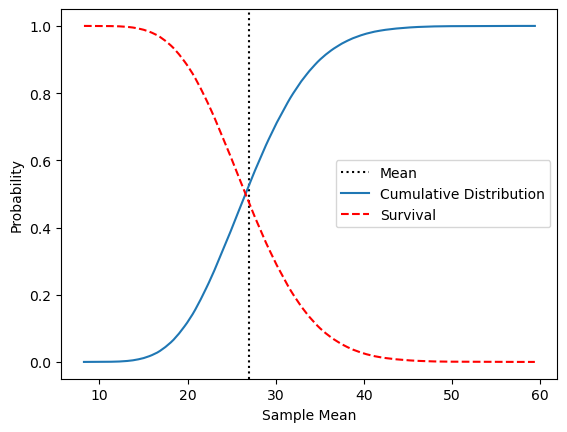

In [107]:
rv_mean = random_variable.mean()
print(f"Mean of the distribution is approximately {rv_mean:.2f} cm")
plt.axvline(random_variable.mean(), color='k', label='Mean', linestyle=':') 
plt.plot(bin_edges, random_variable.cdf(bin_edges), label='Cumulative Distribution')
plt.plot(bin_edges, random_variable.sf(bin_edges), label='Survival', linestyle='--', color='r')
plt.xlabel('Sample Mean')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [108]:
prob_extreme= random_variable.sf(37) + random_variable.cdf(17) 
print("Probability of observing an extreme sample mean is approximately " f"{prob_extreme:.2f}")

Probability of observing an extreme sample mean is approximately 0.10


In [109]:
estimated_sem = random_variable.std()
p_value = compute_p_value(27, 37, estimated_sem)
print(f"P-value computed from estimated SEM is approximately {p_value:.2f}")

P-value computed from estimated SEM is approximately 0.10


In [110]:
number_extreme_values = 0
for sample_mean in sample_means:
    if not 17 < sample_mean < 37:
        number_extreme_values += 1
p_value = number_extreme_values / len(sample_means) 
print(f"P-value is approximately {p_value:.2f}")


P-value is approximately 0.10


In [111]:
new_fish_lengths = np.array([51, 46.5, 51.6, 47, 54.4, 40.5, 43, 43.1, 35.9, 47.0])
assert new_fish_lengths.mean() == 46

In [112]:
mean_diff = abs(new_fish_lengths.mean() - fish_lengths.mean()) 
print(f"There is a {mean_diff:.2f} cm difference between the two means")


There is a 19.00 cm difference between the two means


In [113]:
total_fish_lengths = np.hstack([fish_lengths, new_fish_lengths])
assert total_fish_lengths.size == 30

In [114]:
np.random.seed(0)
np.random.shuffle(total_fish_lengths)


In [115]:
random_20_fish_lengths = total_fish_lengths[:20]
random_10_fish_lengths = total_fish_lengths[20:]
mean_diff = random_20_fish_lengths.mean() - random_10_fish_lengths.mean() 
print(f"The new difference between mean fish lengths is {mean_diff:.2f}")


The new difference between mean fish lengths is 14.33


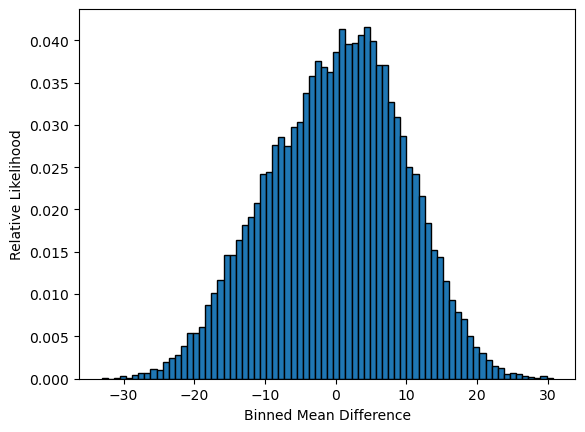

In [116]:
np.random.seed(0)
mean_diffs = []
for _ in range(30000):
    np.random.shuffle(total_fish_lengths)
    mean_diff = total_fish_lengths[:20].mean() - total_fish_lengths[20:].mean()
    mean_diffs.append(mean_diff)
likelihoods, bin_edges, _ = plt.hist(mean_diffs, bins='auto', edgecolor='black', density=True)
plt.xlabel('Binned Mean Difference')
plt.ylabel('Relative Likelihood')
plt.show()


In [117]:
random_variable = stats.rv_histogram((likelihoods, bin_edges))

In [118]:
p_value = random_variable.sf(19) + random_variable.cdf(-19) 
print(f"P-value is approximately {p_value:.2f}")


P-value is approximately 0.04


In [119]:
number_extreme_values = 0.0
for min_diff in mean_diffs:
    if not -19 < min_diff < 19:
        number_extreme_values += 1
p_value = number_extreme_values / len(mean_diffs) 
print(f"P-value is approximately {p_value:.2f}")


P-value is approximately 0.04


In [120]:
fish_measures = {'Fish': ['Angelfish', 'Zebrafish', 'Killifish', 'Swordtail'], 'Length':[15.2, 6.5, 9, 6], 'Width': [7.7, 2.1, 4.5, 2]}


In [121]:
zebrafish_index = fish_measures['Fish'].index('Zebrafish') 
zebrafish_length = fish_measures['Length'][zebrafish_index] 
print(f"The length of a zebrafish is {zebrafish_length:.2f} cm")

The length of a zebrafish is 6.50 cm


In [122]:
df = pd.DataFrame(fish_measures)
print(df)

        Fish  Length  Width
0  Angelfish    15.2    7.7
1  Zebrafish     6.5    2.1
2  Killifish     9.0    4.5
3  Swordtail     6.0    2.0


In [123]:
print(df.head(2))

        Fish  Length  Width
0  Angelfish    15.2    7.7
1  Zebrafish     6.5    2.1


In [124]:
print(df.describe())

          Length     Width
count   4.000000  4.000000
mean    9.175000  4.075000
std     4.225616  2.678775
min     6.000000  2.000000
25%     6.375000  2.075000
50%     7.750000  3.300000
75%    10.550000  5.300000
max    15.200000  7.700000


In [125]:
print(df.mean())

Length    9.175
Width     4.075
dtype: float64


/var/folders/y0/ybd_19zx7ysgpxrsrdkzf22m0000gn/T/ipykernel_1029/2807316344.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())


In [126]:
print(df.describe(include=[np.object]))

             Fish
count           4
unique          4
top     Angelfish
freq            1


/var/folders/y0/ybd_19zx7ysgpxrsrdkzf22m0000gn/T/ipykernel_1029/349345008.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df.describe(include=[np.object]))


In [127]:
print(df.values)
assert type(df.values) == np.ndarray

[['Angelfish' 15.2 7.7]
 ['Zebrafish' 6.5 2.1]
 ['Killifish' 9.0 4.5]
 ['Swordtail' 6.0 2.0]]


In [128]:
print(df.columns)

Index(['Fish', 'Length', 'Width'], dtype='object')


In [129]:
print(df.Fish)

0    Angelfish
1    Zebrafish
2    Killifish
3    Swordtail
Name: Fish, dtype: object


In [130]:
print(df.Fish.values)
assert type(df.Fish.values) == np.ndarray

['Angelfish' 'Zebrafish' 'Killifish' 'Swordtail']


In [131]:
print(df['Fish'])

0    Angelfish
1    Zebrafish
2    Killifish
3    Swordtail
Name: Fish, dtype: object


In [132]:
print(df[['Fish', 'Length']])

        Fish  Length
0  Angelfish    15.2
1  Zebrafish     6.5
2  Killifish     9.0
3  Swordtail     6.0


In [133]:
print(df.sort_values('Length'))

        Fish  Length  Width
3  Swordtail     6.0    2.0
1  Zebrafish     6.5    2.1
2  Killifish     9.0    4.5
0  Angelfish    15.2    7.7


In [134]:
print(df[df.Width >= 3])

        Fish  Length  Width
0  Angelfish    15.2    7.7
2  Killifish     9.0    4.5


In [135]:
print(df.loc[[0, 3]])

        Fish  Length  Width
0  Angelfish    15.2    7.7
3  Swordtail     6.0    2.0


In [136]:
booleans = [name in ['Angelfish', 'Swordtail'] for name in df.Fish]
print(df[booleans])


        Fish  Length  Width
0  Angelfish    15.2    7.7
3  Swordtail     6.0    2.0


In [137]:
print(df[df.Fish.isin(['Angelfish', 'Swordtail'])])

        Fish  Length  Width
0  Angelfish    15.2    7.7
3  Swordtail     6.0    2.0


In [138]:
df.set_index('Fish', inplace=True)
print(df)


           Length  Width
Fish                    
Angelfish    15.2    7.7
Zebrafish     6.5    2.1
Killifish     9.0    4.5
Swordtail     6.0    2.0


In [139]:
print(df.loc[['Angelfish', 'Swordtail']])

           Length  Width
Fish                    
Angelfish    15.2    7.7
Swordtail     6.0    2.0


In [140]:
df_transposed = df.T
print(df_transposed)

Fish    Angelfish  Zebrafish  Killifish  Swordtail
Length       15.2        6.5        9.0        6.0
Width         7.7        2.1        4.5        2.0


In [141]:
print(df_transposed.Swordtail)

Length    6.0
Width     2.0
Name: Swordtail, dtype: float64


In [142]:
df_transposed['Clownfish'] = [10.6, 3.7]
print(df_transposed)

Fish    Angelfish  Zebrafish  Killifish  Swordtail  Clownfish
Length       15.2        6.5        9.0        6.0       10.6
Width         7.7        2.1        4.5        2.0        3.7


In [143]:
df_new = df_transposed.assign(Clownfish2=[10.6, 3.7], Clownfish3=[10.6, 3.7]) 
assert 'Clownfish2' not in df_transposed.columns
assert 'Clownfish2' in df_new.columns
print(df_new)

Fish    Angelfish  Zebrafish  Killifish  Swordtail  Clownfish  Clownfish2  \
Length       15.2        6.5        9.0        6.0       10.6        10.6   
Width         7.7        2.1        4.5        2.0        3.7         3.7   

Fish    Clownfish3  
Length        10.6  
Width          3.7  


In [144]:
df_new.drop(columns=['Clownfish2', 'Clownfish3'], inplace=True) 
print(df_new)

Fish    Angelfish  Zebrafish  Killifish  Swordtail  Clownfish
Length       15.2        6.5        9.0        6.0       10.6
Width         7.7        2.1        4.5        2.0        3.7


In [145]:
areas = []
for fish_species, (length, width) in df_new.items():
    area = math.pi * length * width / 4
    print(f"Area of {fish_species} is {area}")
    areas.append(area)

Area of Angelfish is 91.92300104403735
Area of Zebrafish is 10.720684930375171
Area of Killifish is 31.808625617596654
Area of Swordtail is 9.42477796076938
Area of Clownfish is 30.80331596844792


In [146]:
df_new.loc['Area'] = areas
df_new.reindex()
print(df_new)

Fish    Angelfish  Zebrafish  Killifish  Swordtail  Clownfish
Length  15.200000   6.500000   9.000000   6.000000  10.600000
Width    7.700000   2.100000   4.500000   2.000000   3.700000
Area    91.923001  10.720685  31.808626   9.424778  30.803316


In [147]:
row_count, column_count = df_new.shape
print(f"Our table contains {row_count} rows and {column_count} columns")

Our table contains 3 rows and 5 columns


In [148]:
df_new.to_csv('Fish_measurements.csv')
with open('Fish_measurements.csv') as f: print(f.read())


,Angelfish,Zebrafish,Killifish,Swordtail,Clownfish
Length,15.2,6.5,9.0,6.0,10.6
Width,7.7,2.1,4.5,2.0,3.7
Area,91.92300104403735,10.720684930375171,31.808625617596654,9.42477796076938,30.80331596844792



In [149]:
df = pd.read_csv('Fish_measurements.csv', index_col=0) 
print(df)
print("\nRow index names when column is assigned:") 
print(df.index.values)
df_no_assign = pd.read_csv('Fish_measurements.csv') 
print("\nRow index names when no column is assigned:") 
print(df_no_assign.index.values)

        Angelfish  Zebrafish  Killifish  Swordtail  Clownfish
Length  15.200000   6.500000   9.000000   6.000000  10.600000
Width    7.700000   2.100000   4.500000   2.000000   3.700000
Area    91.923001  10.720685  31.808626   9.424778  30.803316

Row index names when column is assigned:
['Length' 'Width' 'Area']

Row index names when no column is assigned:
[0 1 2]


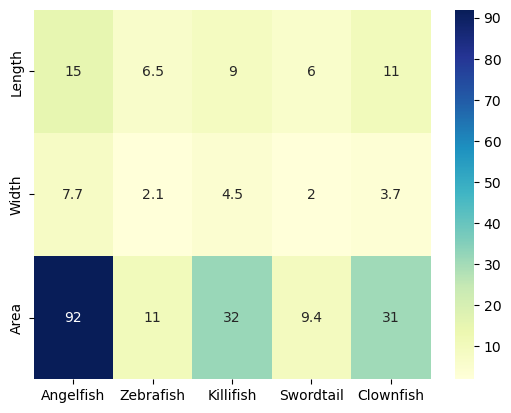

In [153]:
#
# sns.heatmap(df)
# plt.show()

# sns.heatmap(df, cmap='YlGnBu')
# plt.show()

sns.heatmap(df, cmap='YlGnBu', annot=True)
plt.show()

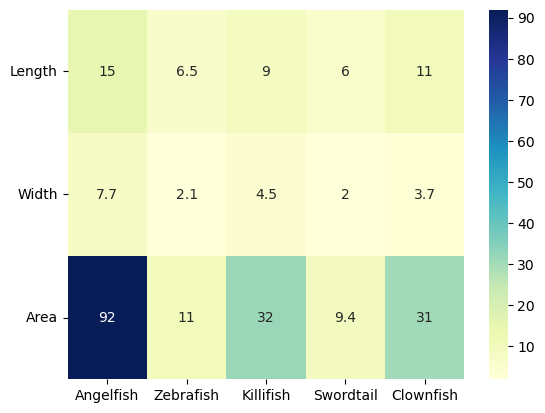

In [154]:
sns.heatmap(df, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)
plt.show()


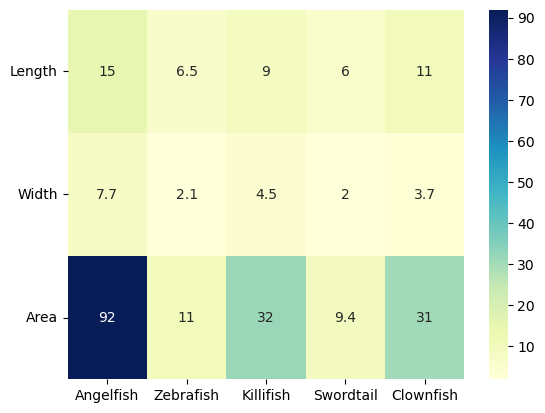

In [155]:
sns.heatmap(df.values,
            cmap='YlGnBu', annot=True,
            xticklabels=df.columns,
            yticklabels=df.index)
plt.yticks(rotation=0)
plt.show()